# Project Summary: Black-Scholes Option Pricing and Implied Volatility

## 📈  Goal
Explore the Black-Scholes pricing model for European call options, compute option prices, invert the model to find implied volatility, and visualize the implied volatility surface using real market data.

---

## 🧮 A – Analytical Call Price

- Implement a Python function `Call(P0, r, sigma, T, K)` to compute the Black-Scholes price of a European call option.
- Use the parameters:  
  `P0 = 1`, `r = 0.05`, `sigma = 0.2`, `T = 2`, `K = 0.8`.

✅ **Output**: Analytical call price using closed-form formula.

---

## 🔁 B – Implied Volatility (Inversion)

- Implement a Python function `ImpliedVola(P0, r, T, K, C)` using `scipy.optimize.root`.
- The function should solve for `sigma` such that the call price matches a given market price `C`.
- Check correctness using the price from part (A).

✅ **Output**: Implied volatility that fits the call price.

---

## 📊 C – Real Market Data (EuroStoxx 50)

- Load `OptionValue.csv` containing call option prices for various strikes and maturities.
- Extract maturities, risk-free rates, and option prices.
- Use `P0 = 2890.62` (current EuroStoxx 50 price).
- Compute implied volatilities for all entries using the function from part (B).

✅ **Output**: Matrix of implied volatilities.

---

## 🌐 D – 3D Volatility Surface Plot

- Plot the implied volatility surface using `matplotlib`’s 3D plotting tools:
  ```python
  ax = fig.add_subplot(111, projection='3d')


In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import root
import matplotlib.pyplot as plt

In [2]:
# A - Black Scholes call price
# parameters of BS pricing for a european call option
p0 = 1      # initial price
r = 0.05    # risk neutral drift
sigma = 0.2 # volatility
T = 2       # time to maturity
K = 0.8     # strike price

def BScall(p0, r, sigma,T,K):
    d1 = (np.log(p0 / K) + (r + 0.5 * sigma * sigma) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = p0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call

call = BScall(p0,r,sigma,T,K)

print(f'The risk-neutral price of a European call option in the Black-Scholes model with parameters:\n'
      f'initial price (P0) = {p0}\n'
      f'risk-neutral drift (r) = {r}\n'
      f'volatility (sigma) = {sigma}\n'
      f'time to maturity (T) = {T}\n'
      f'strike price (K) = {K}\n'
      f'is:\n'
      f'Call Price = {call:.4f}')

The risk-neutral price of a European call option in the Black-Scholes model with parameters:
initial price (P0) = 1
risk-neutral drift (r) = 0.05
volatility (sigma) = 0.2
time to maturity (T) = 2
strike price (K) = 0.8
is:
Call Price = 0.2912


In [3]:
# B implied volatility
def ImpliedVola(p0,r,T,K,C):
    f = lambda x: (BScall(p0,r,x,T,K) - C)
    return root(fun=f, x0 = 1).x[0]     #taking sigma0=1.0 is a reasonable first guess
isigma = ImpliedVola(p0,r,T,K,call)
print(f'''Implied Volatility Calculation:
  Given call price: {call:.4f}
  Implied Volatility: {isigma:.4f}
  True Volatility: {sigma:.4f}''')


Implied Volatility Calculation:
  Given call price: 0.2912
  Implied Volatility: 0.2000
  True Volatility: 0.2000


In [4]:
# C computing implied volatilities 'OptionValues.csv'
optiondata = np.loadtxt('OptionValues.csv',delimiter=';')
maturities = optiondata[0] 
interestrates = optiondata[1]
strikes = np.arange(2700,3400,100)
callprices = optiondata[2:len(optiondata)]

#index i: goes over strike prices
# index j: zips interest rates and maturities

assert len(maturities) == len(interestrates)
ivolatilities = np.zeros((len(strikes),len(maturities)))
p0 = 2890.62 # fixed in the exercise

for i in range(len(strikes)):
    K = strikes[i]
    for j in range(len(maturities)):
        T = maturities[j] / 12
        r = interestrates[j]
        C = callprices[i,j]
        ivolatilities[i,j] = ImpliedVola(p0,r,T,K,C)
print("Implied Volatility Matrix (σ):\n")
print(np.round(ivolatilities,3))
        

Implied Volatility Matrix (σ):

[[0.333 0.307 0.295 0.222 0.217 0.213]
 [0.302 0.258 0.278 0.22  0.216 0.216]
 [0.284 0.255 0.264 0.215 0.212 0.211]
 [0.267 0.255 0.24  0.202 0.208 0.206]
 [0.242 0.236 0.24  0.207 0.204 0.204]
 [0.25  0.238 0.235 0.199 0.197 0.192]
 [0.249 0.234 0.226 0.197 0.197 0.189]]


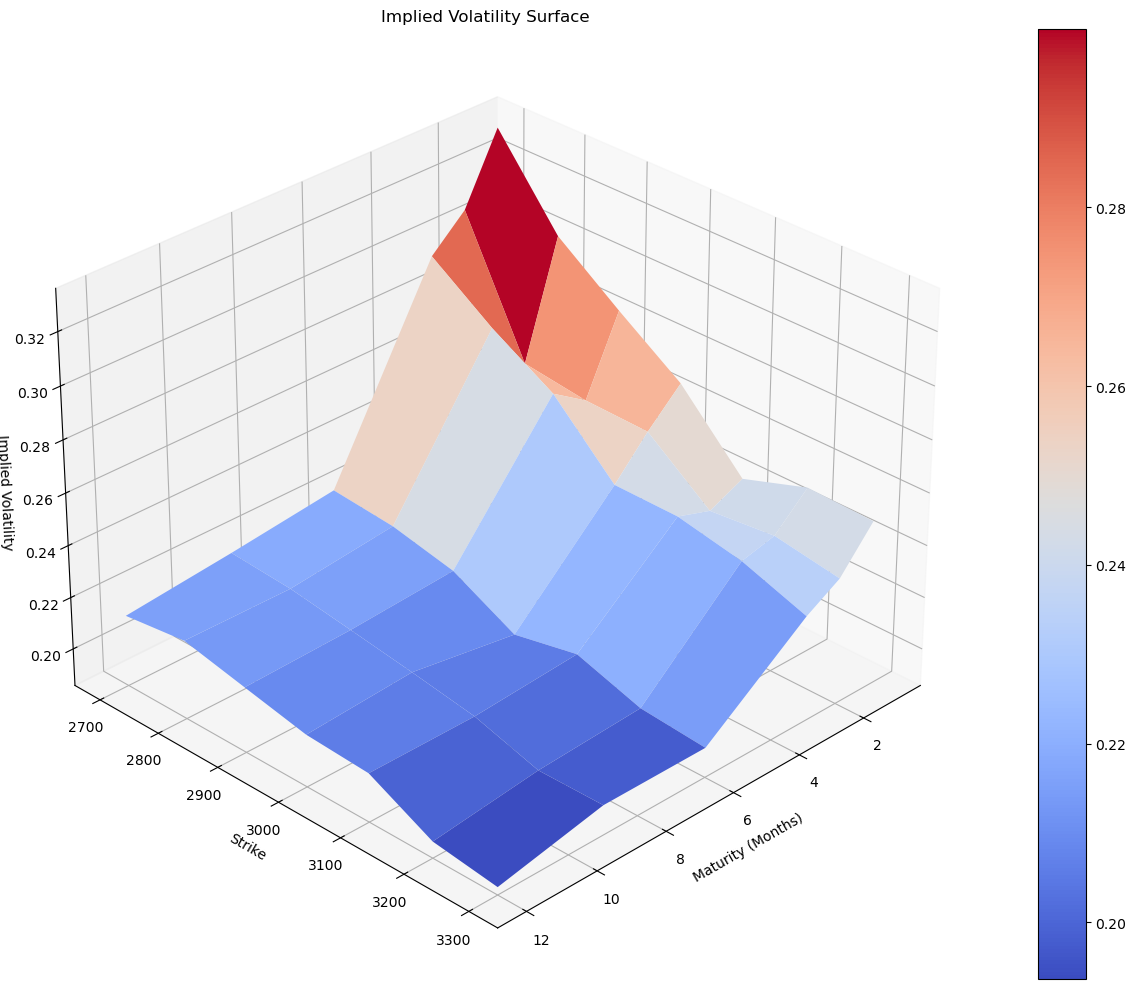

In [5]:
from matplotlib import cm
# D visualize the volatility surface
X, Y = np.meshgrid(maturities,strikes) # create X,Y axis
Z = ivolatilities
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111,projection='3d')
surface = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)

ax.set_xlabel('Maturity (Months)')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface')
fig.colorbar(surface)

# Set viewing angle
ax.view_init(elev=30, azim=45)
plt.tight_layout()

plt.show()